# 

In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.datasets import make_multilabel_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.svm import SVR, SVC
from xgboost import XGBRegressor, XGBClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier, BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold

In [4]:
df = pd.read_csv('diabetesdata.csv')

In [5]:
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [7]:
df.isna().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

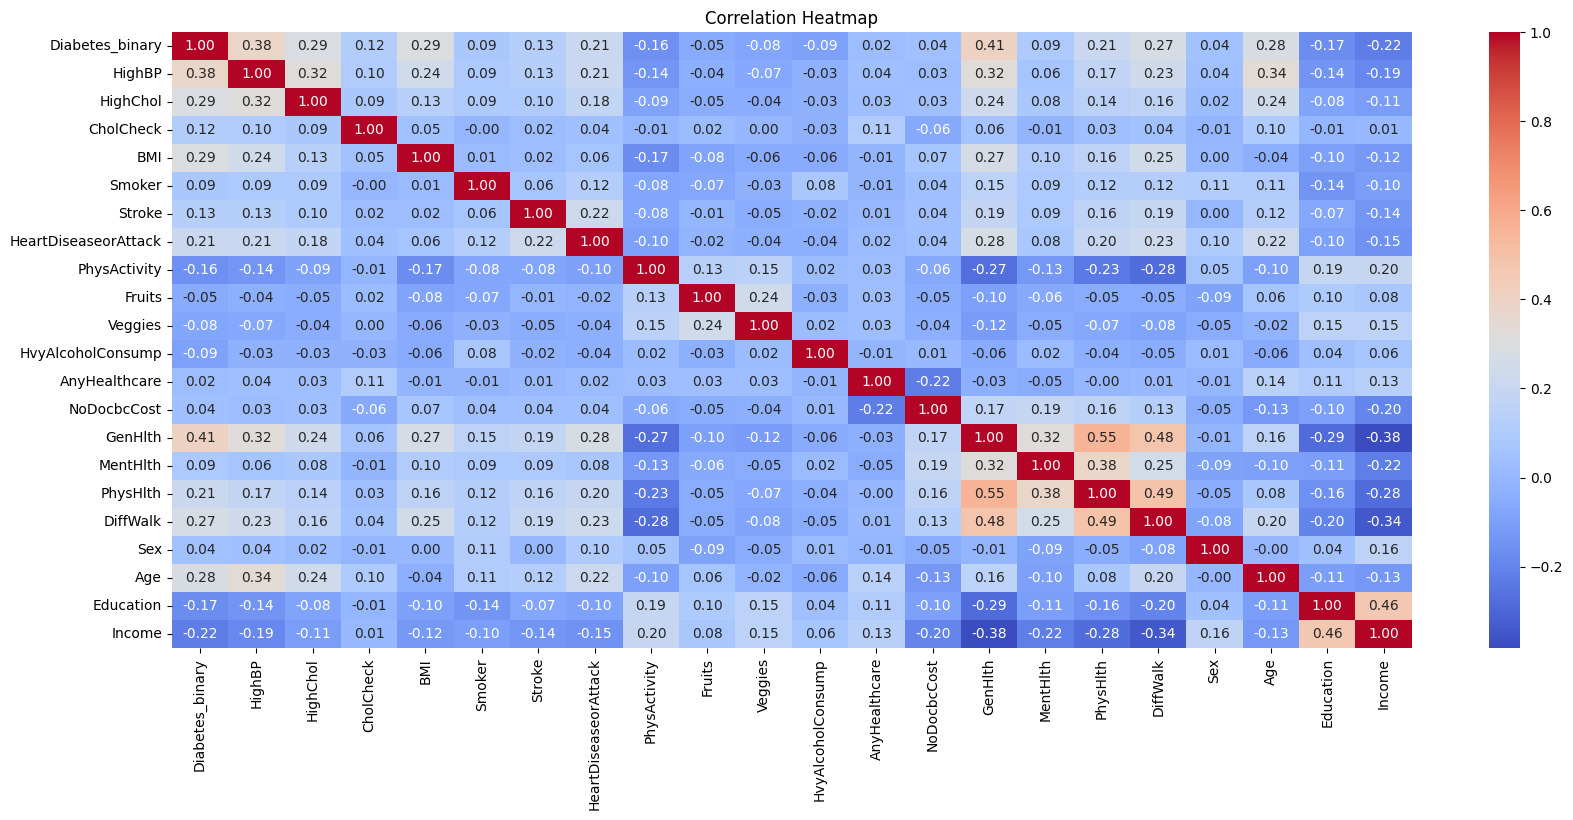

In [8]:
plt.figure(figsize=(20, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [9]:
df1 = df.drop(columns=['Income','Education'])

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [11]:
X = df1.drop(columns=['Diabetes_binary', 'HeartDiseaseorAttack'])
Y1 = df1['Diabetes_binary']
Y2 = df1['HeartDiseaseorAttack']

In [12]:
print(df1['HeartDiseaseorAttack'].value_counts())
print(df1['Diabetes_binary'].value_counts())

HeartDiseaseorAttack
0.0    60243
1.0    10449
Name: count, dtype: int64
Diabetes_binary
0.0    35346
1.0    35346
Name: count, dtype: int64


In [13]:
## SMOTE Diabetes
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, Y1)

# X for diabetes
diabetes = pd.concat([pd.DataFrame(X_res), pd.DataFrame(y_res, columns=['Diabetes_binary'])], axis=1)

print(diabetes.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   HighBP             70692 non-null  float64
 1   HighChol           70692 non-null  float64
 2   CholCheck          70692 non-null  float64
 3   BMI                70692 non-null  float64
 4   Smoker             70692 non-null  float64
 5   Stroke             70692 non-null  float64
 6   PhysActivity       70692 non-null  float64
 7   Fruits             70692 non-null  float64
 8   Veggies            70692 non-null  float64
 9   HvyAlcoholConsump  70692 non-null  float64
 10  AnyHealthcare      70692 non-null  float64
 11  NoDocbcCost        70692 non-null  float64
 12  GenHlth            70692 non-null  float64
 13  MentHlth           70692 non-null  float64
 14  PhysHlth           70692 non-null  float64
 15  DiffWalk           70692 non-null  float64
 16  Sex                706

In [14]:
Y_diabetes = diabetes['Diabetes_binary']
X_diabetes = diabetes.drop(columns=['Diabetes_binary'])

In [15]:
## SMOTE HeartDiseaseorAttack
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, Y2)

# X for heart
heart = pd.concat([pd.DataFrame(X_res), pd.DataFrame(y_res, columns=['HeartDiseaseorAttack'])], axis=1)

print(heart['HeartDiseaseorAttack'].value_counts())

HeartDiseaseorAttack
0.0    60243
1.0    60243
Name: count, dtype: int64


In [16]:
Y_heart = heart['HeartDiseaseorAttack']
X_heart = heart.drop(columns=['HeartDiseaseorAttack'])

In [17]:
X_diabetes_train, X_diabetes_test, Y_diabetes_train, Y_diabetes_test = train_test_split(X_diabetes, Y_diabetes, test_size=0.3, random_state=42)
X_heart_train, X_heart_test, Y_heart_train, Y_heart_test = train_test_split(X_heart, Y_heart, test_size=0.3, random_state=42)

## MODEL FOR DIABETES PREDICTION

In [18]:
LR_diabetes = LogisticRegression()
RFC_diabetes = RandomForestClassifier()
KNC_diabetes = KNeighborsClassifier()

# LR_diabetes.fit(X_diabetes_train, Y_diabetes_train)
# RFC_diabetes.fit(X_diabetes_train, Y_diabetes_train)
# KNC_diabetes.fit(X_diabetes_train, Y_diabetes_train)
# SVC_diabetes.fit(X_diabetes_train, Y_diabetes_train)
# XGB_diabetes.fit(X_diabetes_train, Y_diabetes_train)

In [19]:
bagging_diabetes = BaggingClassifier(estimator=LR_diabetes, n_estimators=100, random_state=42)
bagging_diabetes.fit(X_diabetes_train, Y_diabetes_train)
bagging_diabetes_pred = bagging_diabetes.predict(X_diabetes_test)
print(classification_report(Y_diabetes_test, bagging_diabetes_pred))

C:\Users\axell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\axell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

              precision    recall  f1-score   support

         0.0       0.76      0.72      0.74     10601
         1.0       0.73      0.77      0.75     10607

    accuracy                           0.75     21208
   macro avg       0.75      0.75      0.75     21208
weighted avg       0.75      0.75      0.75     21208



In [20]:
pred_prob = bagging_diabetes.predict_proba(X_diabetes_test)[:,1]
# L_pred = LR
for i, prob in enumerate(pred_prob):
    print(f"Probability of diabetes for test instance {i+1}: {prob:.2f}")

Probability of diabetes for test instance 1: 0.56
Probability of diabetes for test instance 2: 0.55
Probability of diabetes for test instance 3: 0.47
Probability of diabetes for test instance 4: 0.46
Probability of diabetes for test instance 5: 0.81
Probability of diabetes for test instance 6: 0.52
Probability of diabetes for test instance 7: 0.74
Probability of diabetes for test instance 8: 0.89
Probability of diabetes for test instance 9: 0.86
Probability of diabetes for test instance 10: 0.07
Probability of diabetes for test instance 11: 0.22
Probability of diabetes for test instance 12: 0.13
Probability of diabetes for test instance 13: 0.85
Probability of diabetes for test instance 14: 0.75
Probability of diabetes for test instance 15: 0.02
Probability of diabetes for test instance 16: 0.13
Probability of diabetes for test instance 17: 0.61
Probability of diabetes for test instance 18: 0.06
Probability of diabetes for test instance 19: 0.19
Probability of diabetes for test instanc

In [21]:
ensemble_diabetes = VotingClassifier(estimators=[('bagging', bagging_diabetes), ('lr', LR_diabetes), ('rfc', RFC_diabetes), ('knc', KNC_diabetes)], voting='soft')
ensemble_diabetes.fit(X_diabetes_train, Y_diabetes_train)
ensemble_diabetes_pred = ensemble_diabetes.predict(X_diabetes_test)
print(classification_report(Y_diabetes_test, ensemble_diabetes_pred))

C:\Users\axell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\axell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

              precision    recall  f1-score   support

         0.0       0.76      0.71      0.74     10601
         1.0       0.73      0.78      0.75     10607

    accuracy                           0.75     21208
   macro avg       0.75      0.75      0.74     21208
weighted avg       0.75      0.75      0.74     21208



In [22]:
LR_heart = LogisticRegression()
RFC_heart = RandomForestClassifier()
KNC_heart = KNeighborsClassifier()

In [23]:
bagging_heart = BaggingClassifier(estimator=LR_heart, n_estimators=100, random_state=42)
bagging_heart.fit(X_heart_train, Y_heart_train)
bagging_heart_pred = bagging_heart.predict(X_heart_test)
print(classification_report(Y_heart_test, bagging_heart_pred))

C:\Users\axell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\axell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

              precision    recall  f1-score   support

         0.0       0.77      0.71      0.74     18180
         1.0       0.73      0.79      0.76     17966

    accuracy                           0.75     36146
   macro avg       0.75      0.75      0.75     36146
weighted avg       0.75      0.75      0.75     36146



In [24]:
ensemble_heart = VotingClassifier(estimators=[('bagging', bagging_heart), ('lr', LR_heart), ('rfc', RFC_heart), ('knc', KNC_heart)], voting='soft')
ensemble_heart.fit(X_heart_train, Y_heart_train)
ensemble_heart_pred = ensemble_heart.predict(X_heart_test)
print(classification_report(Y_heart_test, ensemble_heart_pred))

C:\Users\axell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\axell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

              precision    recall  f1-score   support

         0.0       0.93      0.79      0.86     18180
         1.0       0.82      0.94      0.87     17966

    accuracy                           0.87     36146
   macro avg       0.87      0.87      0.86     36146
weighted avg       0.87      0.87      0.86     36146



In [25]:
import pickle
pickle.dump(ensemble_diabetes, open('dia_mod88.pkl', 'wb'))
pickle.dump(ensemble_heart, open('heart_mod88.pkl', 'wb'))

In [26]:
import joblib